# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 150
df = pd.DataFrame({
    'date': pd.date_range('2023-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).astype(int),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 9, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 5, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 7, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2023-02-01,West,53,29308.72,6,172.81
1,2023-02-02,North,45,61367.63,2,92.76
2,2023-02-03,South,50,NaN,5,125.20
3,2023-02-04,South,40,25552.15,2,64.83
4,2023-02-05,South,45,27783.39,0,117.70


## 1) First look

In [17]:
df.info(), df.isna().sum(), df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          150 non-null    datetime64[ns]
 1   region        150 non-null    object        
 2   age           150 non-null    int32         
 3   income        141 non-null    float64       
 4   transactions  150 non-null    int32         
 5   spend         145 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(1)
memory usage: 6.0+ KB


(None,
 date            0
 region          0
 age             0
 income          9
 transactions    0
 spend           5
 dtype: int64,
               count                 mean                  min  \
 date            150  2023-04-16 12:00:00  2023-02-01 00:00:00   
 age           150.0            39.793333                 22.0   
 income        141.0         39746.376667             17353.55   
 transactions  150.0             3.886667                  0.0   
 spend         145.0           116.619724                  0.0   
 
                               25%                  50%                  75%  \
 date          2023-03-10 06:00:00  2023-04-16 12:00:00  2023-05-23 18:00:00   
 age                          34.0                 40.0                 45.0   
 income                    31693.6             38029.23             45067.04   
 transactions                  2.0                  3.0                 4.75   
 spend                       71.88               115.95           

## 2) Numeric profile

In [19]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,150.0,39.793333,8.208112,22.00,34.00,40.00,45.00,59.00,-0.076322,-0.120026
income,141.0,39746.376667,11443.447317,17353.55,31693.60,38029.23,45067.04,83512.11,1.015459,1.416802
transactions,150.0,3.886667,4.000900,0.00,2.00,3.00,4.75,20.00,2.993103,9.576889
spend,145.0,116.619724,58.849505,0.00,71.88,115.95,154.03,257.53,0.238169,-0.335846


## 3) Distributions (TODO: add at least 3)

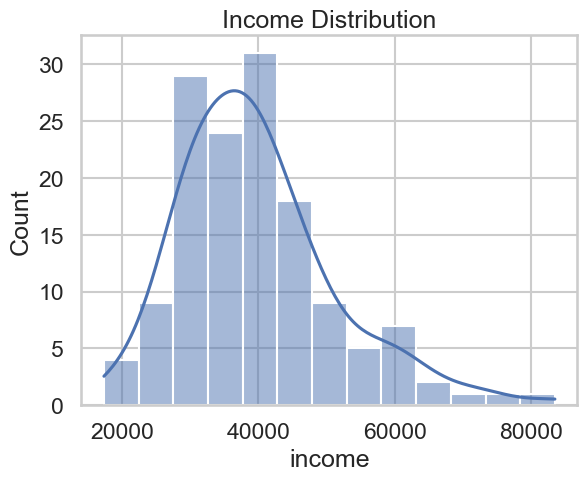

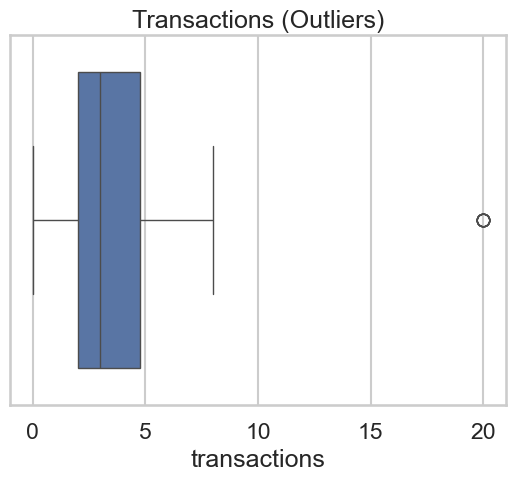

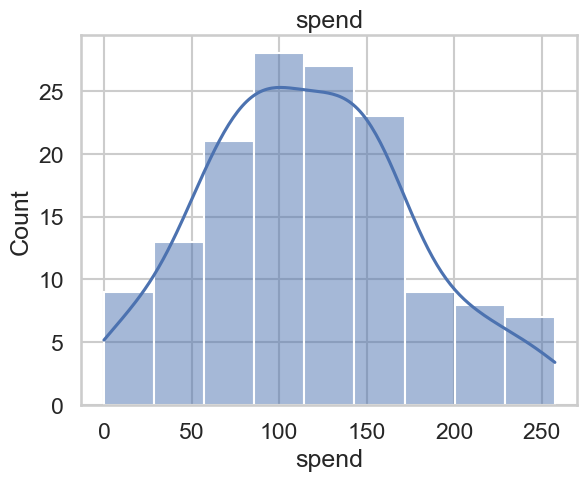

In [87]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()

# df['Age_C'] = 'Old'
# df.loc[(df['age'] >= 22) & (df['age'] < 40), 'Age_C'] = 'Young'
# df.loc[(df['age'] >= 40) & (df['age'] < 60), 'Age_C'] = 'Mid'

# TODO: histogram for spend
sns.histplot(df['spend'], kde=True)
plt.title('spend')
plt.show()


# plt.pie(
#     df['age'],
#     # labels = df['Age_C'],
#     radius = 3
#     # autopct="%1.1f%%",   # show percentages
#     # startangle=90,       # rotate so first slice starts at top
#     # shadow=True,         # optional shadow
#     # explode=(0.05)  # separate first slice a bit
# )

# # plt.title("Age Category:")
# # plt.show()

## 4) Relationships (TODO: add at least 2)

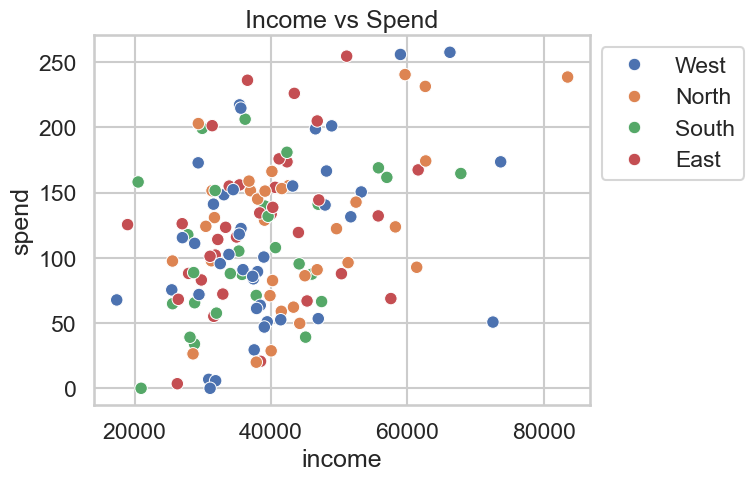

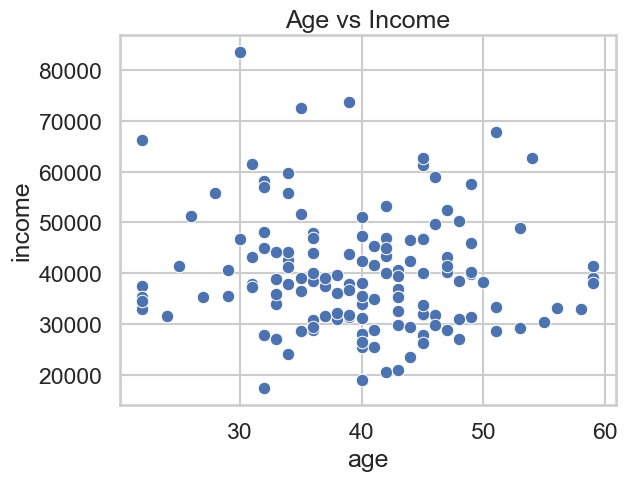

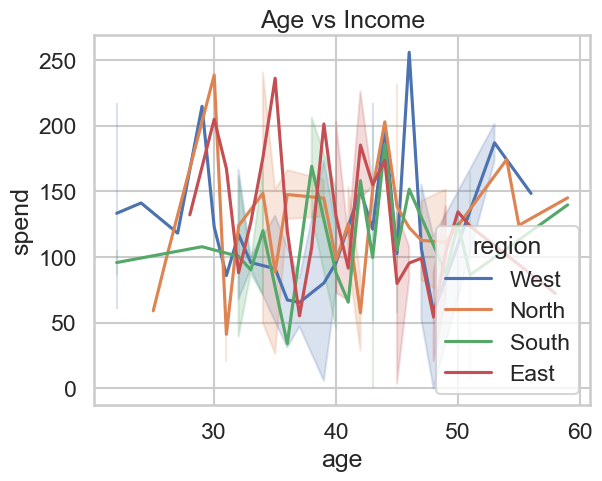

In [101]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.legend(loc = 'upper left', bbox_to_anchor= (1,1))
plt.show()

sns.scatterplot(data=df, x='age', y='income')
plt.title('Age vs Income')
plt.show()

sns.lineplot(data=df, x='age', y='spend', hue ='region') # Age vs Spend categorised by region
plt.title('Age vs Income')
plt.show()

## 5) Correlation matrix

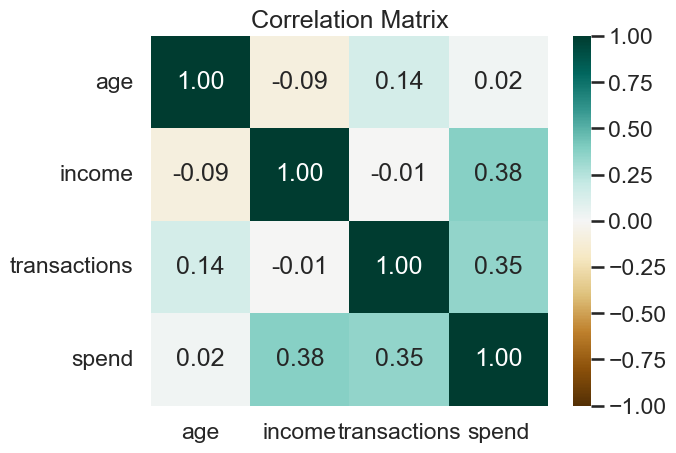

,age,income,transactions,spend
age,1.000000,-0.086606,0.143770,0.020708
income,-0.086606,1.000000,-0.007652,0.377228
transactions,0.143770,-0.007652,1.000000,0.348482
spend,0.020708,0.377228,0.348482,1.000000


In [105]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BrBG', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
Top 3 Insights

- Income distribution is positively skewed (skew ≈ 0.96) with long right tails (lognormal generation). This means a few very high-income individuals pull the average upward.

- Transactions show extreme outliers (max = 20 vs median = 3), confirmed by high skew (3.0) and kurtosis (9.7). 

- Spend is moderately stable (mean ≈ 116, std ≈ 53) with slight right skew. It aligns with income and transactions, showing potential predictive structure.

 Assumptions & Risks

- Synthetic data structure: Since this dataset was generated, distributions may not reflect real-world behavior (assumption of lognormal income, Poisson transactions).

- Missingness mechanism: Income (9 missing) and spend (5 missing) values were dropped in at random; assuming Missing Completely at Random (MCAR), but in real data it may be MAR/MNAR.

- Stationarity & seasonality: Date spans only 150 days, no strong evidence of seasonality, but longer timeframes could reveal trends.

- Outliers handling: Transaction outliers were manually injected; in real cases, these might be fraud, errors, or valid extremes.

Next Steps Before Modeling

- Cleaning

- Impute missing values (median for income/spend or model-based imputation).

- Decide on handling outliers in transactions (cap, winsorize, or keep if realistic).

- Feature Engineering

- Age buckets (young/mid/old) for categorical modeling.

- Income per transaction or spend-to-income ratio.

- Temporal features from date (day of week, month, trend).

- Regional dummies for categorical splits.

- Distributional Adjustments

- Log-transform income to reduce skew.

- Scale/normalize transactions if required for ML algorithms.



